In [1]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=4e6f40ba154c614664681523e084289f0fd24773a0c7b1fc1b05fe2f9ebe4997
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=6b547bfef77fb22c6a769f377fea4428fb91480a0def57f295376c49f262e42d
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from fancyimpute import KNN


In [3]:
pwd

'/content'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Thyroid/dataset.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [5]:
df.shape

(9172, 31)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9172.0,7.355582e+01,1.183977e+03,1.000000e+00,3.700000e+01,5.500000e+01,6.800000e+01,6.552600e+04
TSH,8330.0,5.218403e+00,2.418401e+01,5.000000e-03,4.600000e-01,1.400000e+00,2.700000e+00,5.300000e+02
T3,6568.0,1.970629e+00,8.875788e-01,5.000000e-02,1.500000e+00,1.900000e+00,2.300000e+00,1.800000e+01
TT4,8730.0,1.087003e+02,3.752267e+01,2.000000e+00,8.700000e+01,1.040000e+02,1.260000e+02,6.000000e+02
T4U,8363.0,9.760557e-01,2.003604e-01,1.700000e-01,8.600000e-01,9.600000e-01,1.065000e+00,2.330000e+00
FTI,8370.0,1.136407e+02,4.155165e+01,1.400000e+00,9.300000e+01,1.090000e+02,1.280000e+02,8.810000e+02
TBG,349.0,2.987006e+01,2.108050e+01,1.000000e-01,2.100000e+01,2.600000e+01,3.100000e+01,2.000000e+02
patient_id,9172.0,8.529473e+08,7.581969e+06,8.408010e+08,8.504090e+08,8.510040e+08,8.607110e+08,8.701190e+08


In [7]:
df.describe(include='O').T

,count,unique,top,freq
sex,8865,2,F,6073
on_thyroxine,9172,2,f,7932
query_on_thyroxine,9172,2,f,9019
on_antithyroid_meds,9172,2,f,9056
sick,9172,2,f,8828
pregnant,9172,2,f,9065
thyroid_surgery,9172,2,f,9038
I131_treatment,9172,2,f,9003
query_hypothyroid,9172,2,f,8542
query_hyperthyroid,9172,2,f,8521


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'
,'referral_source','patient_id'],axis=1 ,inplace=True)

In [10]:
target_counts = df['target'].value_counts()
fig = px.bar(x=target_counts.index, y=target_counts.values)
fig.update_layout(xaxis_title='Target', yaxis_title='Count', title='Distribution of Target')
fig.show()

In [11]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [12]:
df = df[df['target'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'AK', 'C|I', 'H|K', 'GK', 'FK', 'GI', 'GKJ', 'D|R', '-'])]

In [13]:
df.shape

(7679, 23)

In [14]:
mapping = {'-':"Negative",
           'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
           'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }
df['target'] = df['target'].map(mapping)

In [15]:
df['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [16]:
target_dist = pd.DataFrame(df['target'].value_counts())
target_dist

,target
Negative,6771
Hypothyroid,667
Hyperthyroid,241


In [17]:
target_dist = pd.DataFrame(df['target'].value_counts()).reset_index()
target_dist.columns = ['target', 'count']

fig = px.pie(target_dist, names='target', values='count')
fig.update_traces(marker=dict(colors=["#BEE9E9", "#6C7B8B", "#3A506B"]))
fig.show()

In [18]:
df = df[df['age'] < 100]

<Axes: >

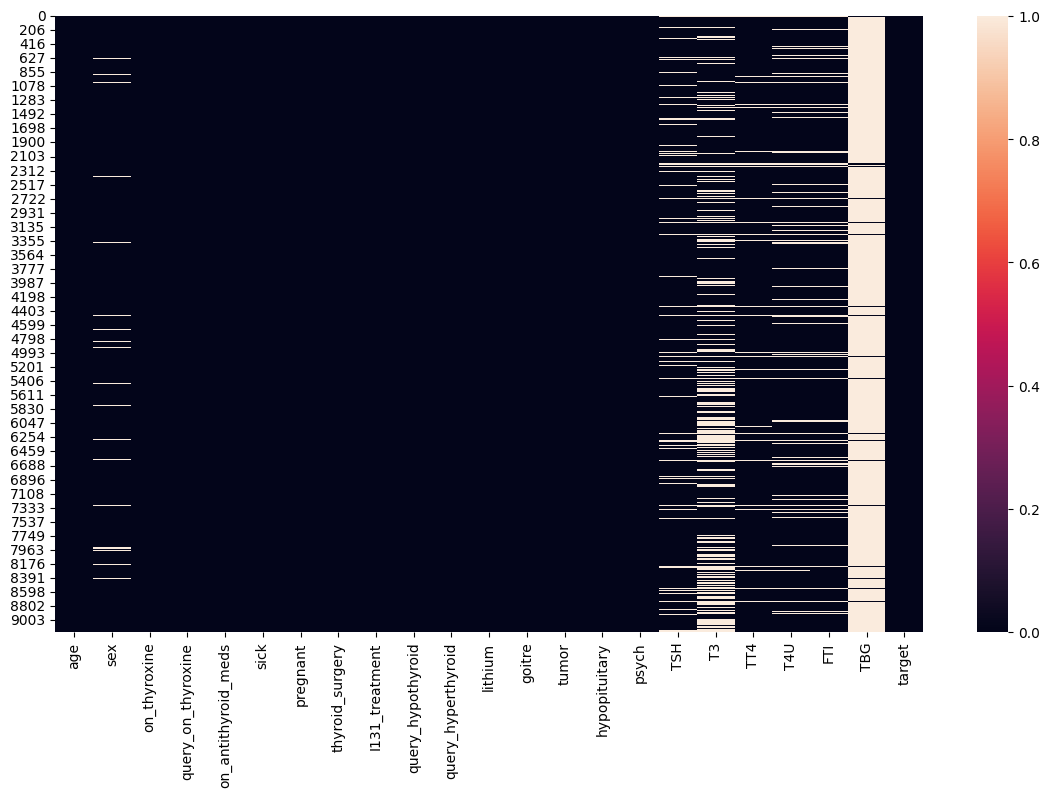

In [19]:
plt.subplots(figsize=(14, 8))
sns.heatmap(df.isnull())

In [20]:
null_cols = df.columns[df.isnull().any()]
nulls_df = df.loc[:, null_cols]
nulls_df = pd.DataFrame(nulls_df.isna().sum()/df.shape[0]*100)
nulls_df = nulls_df.rename(columns={0: 'Missing Values %'})
nulls_df

,Missing Values %
sex,3.309446
TSH,9.433225
T3,28.768730
TT4,4.612378
T4U,8.872964
FTI,8.781759
TBG,96.625407


In [21]:
df = df.drop('TBG', axis=1)

In [22]:
origin = pd.DataFrame(df['target'].value_counts())
after = pd.DataFrame(df.dropna(thresh=21)['target'].value_counts())

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(go.Pie(labels=origin.index, values=origin['target'], marker=dict(colors=["#BEE9E9", "#6C7B8B", "#3A506B"]), name="Origin"), row=1, col=1)
fig.add_trace(go.Pie(labels=after.index, values=after['target'], marker=dict(colors=["#BEE9E9", "#6C7B8B", "#3A506B"]), name="After"), row=1, col=2)

fig.show()

In [23]:
df = df.dropna(thresh=21)

In [24]:
df.shape

(6652, 22)

In [25]:
def analysis(my_df, GoGraph=go.Histogram):
  fig = make_subplots(rows=3, cols=2)

  trace0 = GoGraph(x=my_df.TSH, name='TSH')
  trace1 = GoGraph(x=my_df.T3, name='T3')
  trace2 = GoGraph(x=my_df.TT4, name='TT4')
  trace3 = GoGraph(x=my_df.T4U, name='T4U')
  trace4 = GoGraph(x=my_df.FTI, name='FTI')
  trace5 = GoGraph(x=my_df.sex, name='Gender')

  fig.append_trace(trace0, 1, 1)
  fig.append_trace(trace1, 1, 2)
  fig.append_trace(trace2, 2, 1)
  fig.append_trace(trace3, 2, 2)
  fig.append_trace(trace4, 3, 1)
  fig.append_trace(trace5, 3, 2)

  fig.update_layout(height=950)
  fig.show()
analysis(df)

In [26]:
def rolette_fill(df, column, val1, val2):
    threshold = df[column].value_counts()[val1] / (df.shape[0] - df[column].isnull().sum())

    for i in df.index:
        if pd.isna(df.loc[i, column]) or pd.isnull(df.loc[i, column]):
            rand_num = np.random.rand()
            if rand_num > threshold:
                df.loc[i, column] = val2
            else:
                df.loc[i, column] = val1

    return df

In [27]:
df = rolette_fill(df.copy(), 'sex', 'F', 'M')

In [28]:
columns = ['sex', 'age', 'TT4', 'T3', 'T4U', 'FTI', 'TSH']
b_fill_df = df.loc[:, columns]

In [29]:
b_fill_df = b_fill_df.fillna(np.nan)

In [30]:
sex_to_num = {
    'F':0,
    'M':1,
}
b_fill_df['sex'] = b_fill_df['sex'].map(sex_to_num)

In [31]:
knn = KNN(k=13)
knn_imputed_df = knn.fit_transform(b_fill_df)

Imputing row 1/6652 with 1 missing, elapsed time: 10.643
Imputing row 101/6652 with 0 missing, elapsed time: 10.647
Imputing row 201/6652 with 1 missing, elapsed time: 10.649
Imputing row 301/6652 with 1 missing, elapsed time: 10.652
Imputing row 401/6652 with 0 missing, elapsed time: 10.655
Imputing row 501/6652 with 0 missing, elapsed time: 10.657
Imputing row 601/6652 with 1 missing, elapsed time: 10.660
Imputing row 701/6652 with 0 missing, elapsed time: 10.663
Imputing row 801/6652 with 0 missing, elapsed time: 10.665
Imputing row 901/6652 with 1 missing, elapsed time: 10.667
Imputing row 1001/6652 with 0 missing, elapsed time: 10.670
Imputing row 1101/6652 with 0 missing, elapsed time: 10.673
Imputing row 1201/6652 with 1 missing, elapsed time: 10.674
Imputing row 1301/6652 with 0 missing, elapsed time: 10.676
Imputing row 1401/6652 with 0 missing, elapsed time: 10.678
Imputing row 1501/6652 with 0 missing, elapsed time: 10.681
Imputing row 1601/6652 with 0 missing, elapsed time:

In [32]:
knn_imputed_df = pd.DataFrame(knn_imputed_df, index=b_fill_df.index)
knn_imputed_df = knn_imputed_df.rename(columns=dict(zip(knn_imputed_df.columns,columns)))

In [33]:
analysis(knn_imputed_df)

In [34]:
df.update(knn_imputed_df)

In [35]:
fig = px.violin(df,x='sex', y='age', color='target', points='all', height=700,
                color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})
fig.show()

In [36]:
import plotly.express as px

fig = px.histogram(df, x="TSH", color="target", barmode="overlay",
                  color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})

fig.update_layout(title_text='TSH Level by Diagnosis', yaxis_title='Count')
fig.update_traces(opacity=0.75)
fig.update_xaxes(range= [0,11])
fig.show()

In [37]:
cols = ['TSH', 'TT4', 'FTI']
px.box(df, x=cols, color='target', height=900,
              color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F63366', 'Negative': '#3498db'}
)

In [38]:
px.box(df, x=['T4U', 'T3'], color='target', height=600,color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F63366', 'Negative': '#3498db'})

In [39]:
numerical_df = df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()

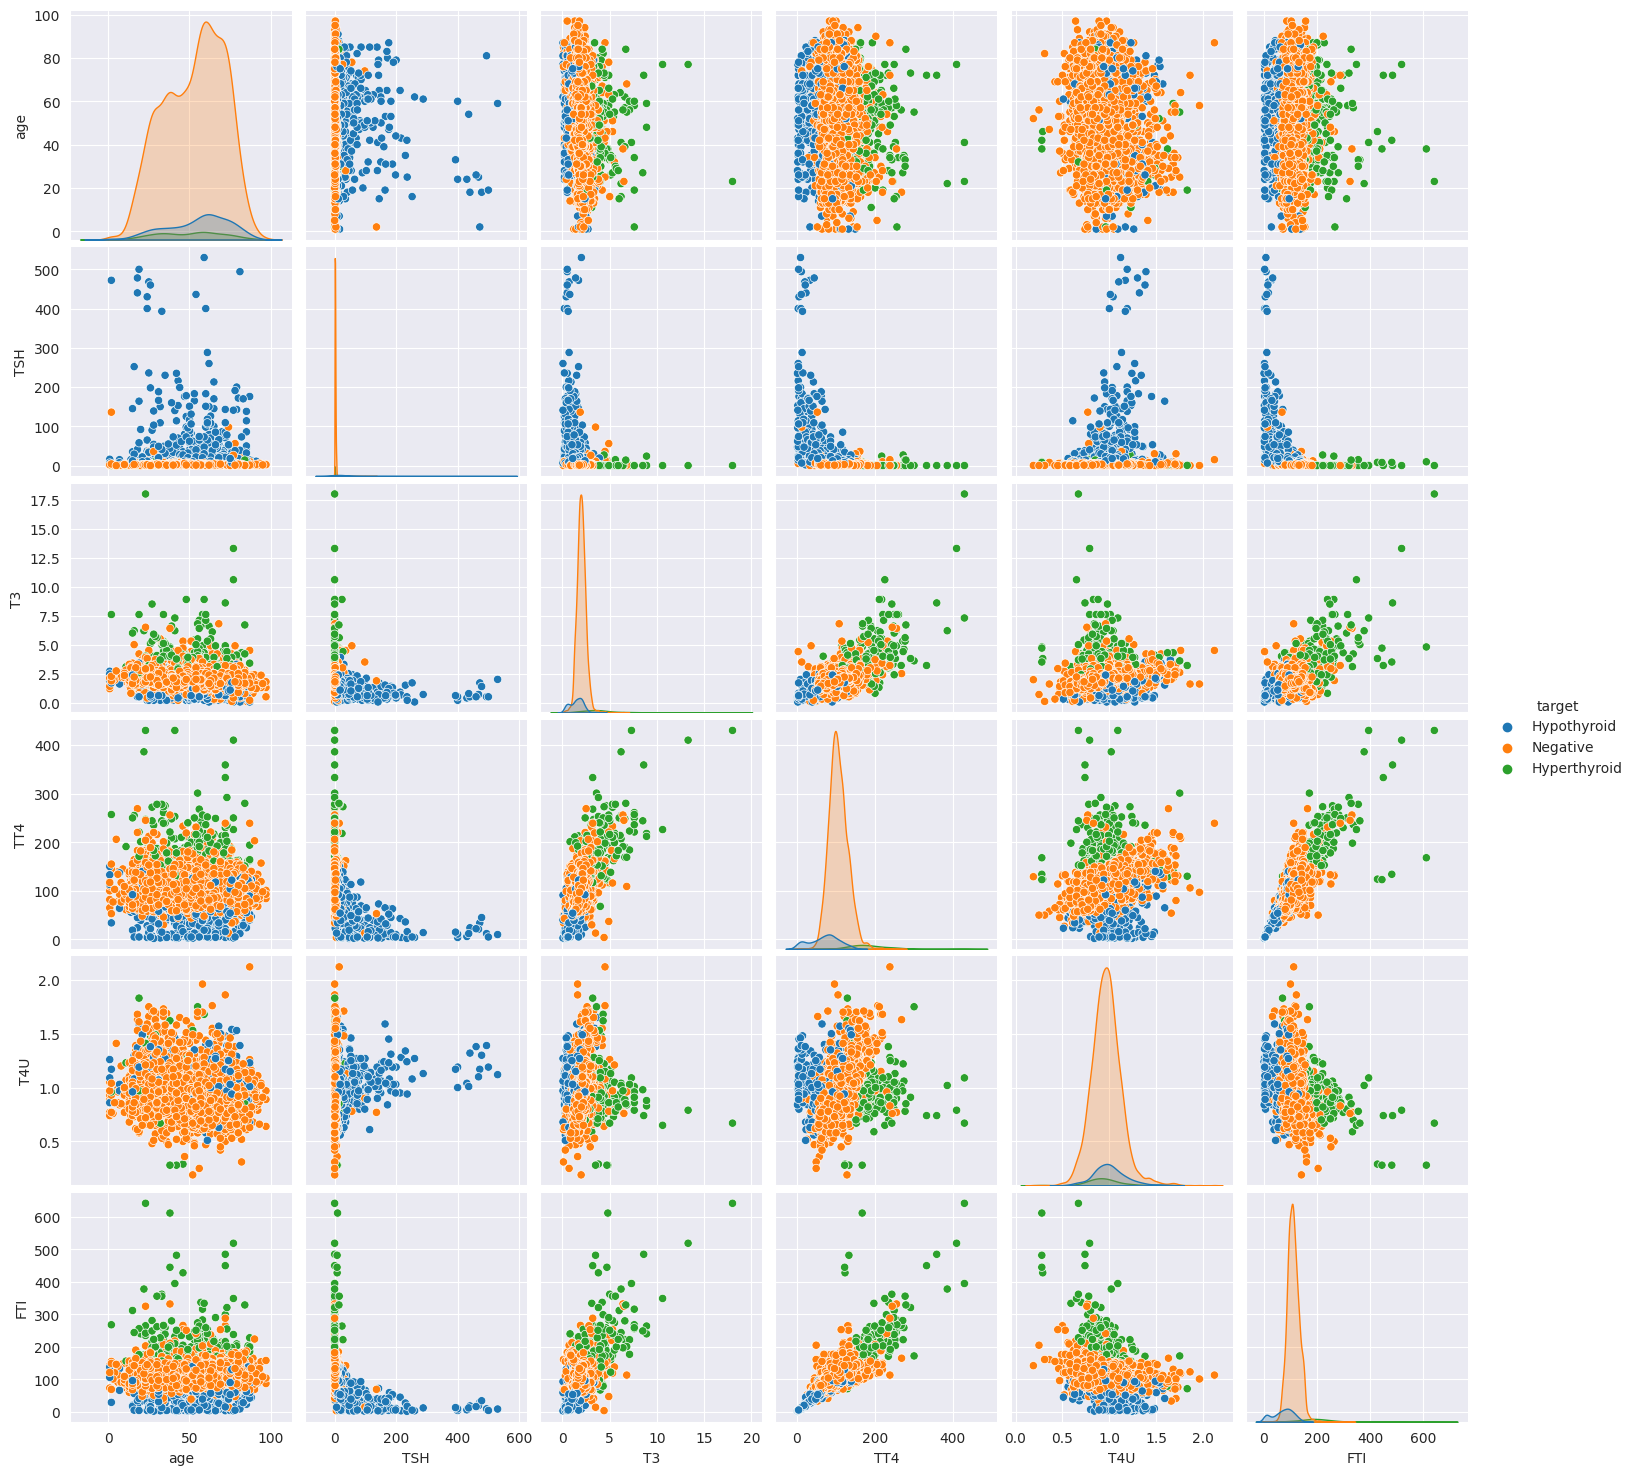

In [40]:
sns.set_style('darkgrid')
sns.pairplot(numerical_df, hue='target')

In [41]:
fig = px.scatter_3d(df, x='T4U', y='T3', z='TSH',color='target', color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'}, height=800)
fig.show()

In [42]:
columns = ['age', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'pregnant', 'target']
model_df = df.loc[:, columns]

In [43]:
model_df['pregnant'] = model_df['pregnant'].replace({'t': 1, 'f': 0})

In [44]:
target_to_num = {
    'Negative': 0,
    'Hypothyroid':1,
    'Hyperthyroid':2,
}
model_df['target'] = model_df['target'].map(target_to_num)

In [45]:
x = model_df.iloc[:, :-1]
y = model_df.iloc[:,-1]

In [46]:
from imblearn.over_sampling import SMOTE, ADASYN

x_smot, y_smot = SMOTE().fit_resample(x, y)

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smot, y_smot, test_size=0.33, random_state=89)

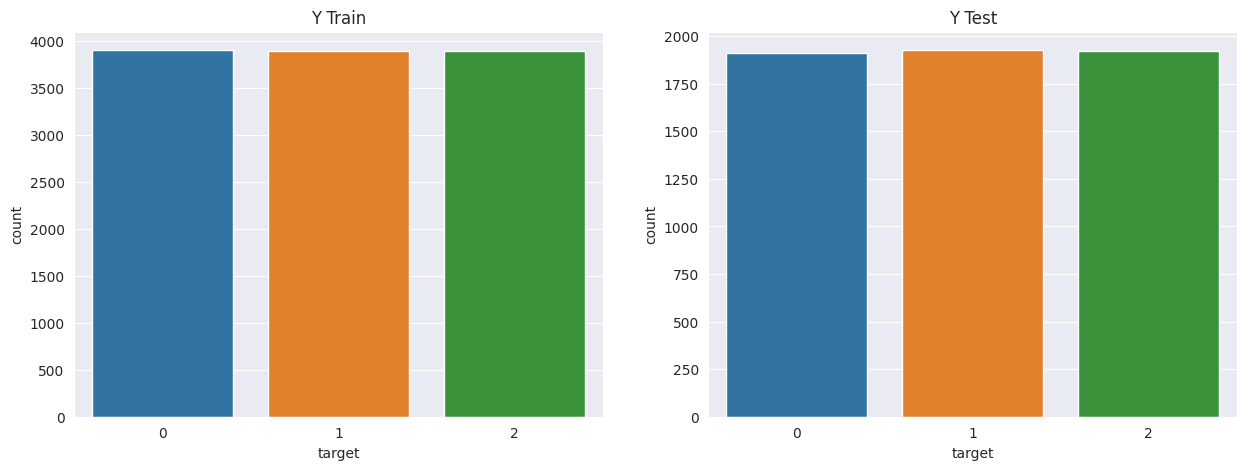

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x= y_train, ax=axs[0])
axs[0].set_title('Y Train')

sns.countplot(x= y_test, ax=axs[1])
axs[1].set_title('Y Test')

fig.show()

Model & Hyperparameter optimization
SVM

In [49]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [50]:
print(SVM.score(x_train, y_train))
print(SVM.score(x_test, y_test))

0.96827975376197
0.9691025863565353


XGBoost

In [51]:
from xgboost import XGBClassifier

XGB = XGBClassifier(max_depth=3)
XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

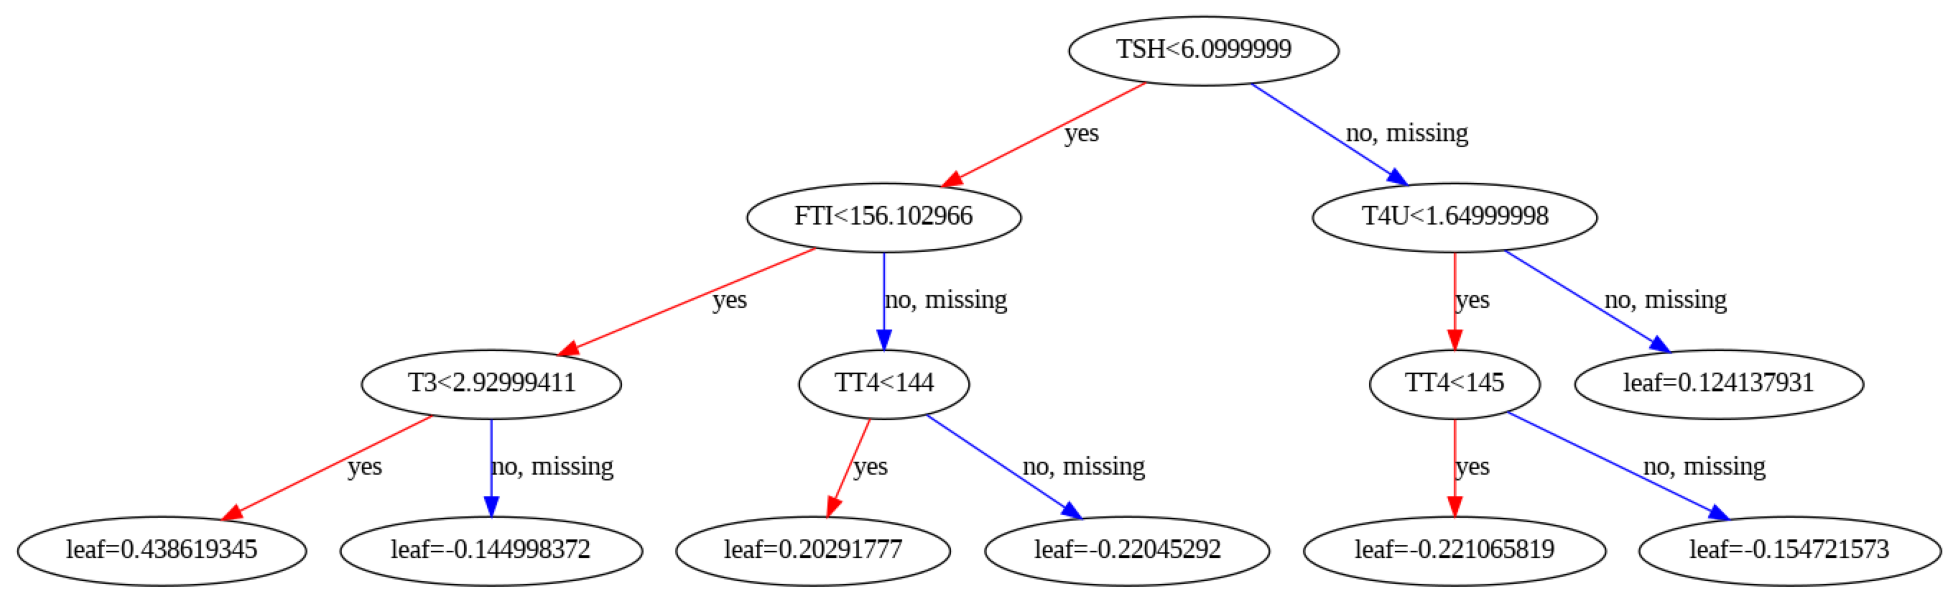

In [52]:
from xgboost import plot_tree

plot_tree(XGB)
fig = plt.gcf()
fig.set_size_inches(25, 20)
plt.show()

In [53]:
print(XGB.score(x_train, y_train))
print(XGB.score(x_test, y_test))

0.998375512995896
0.9921888561013713


In [54]:
from sklearn.metrics import classification_report

SVM_predict = SVM.predict(x_test)
print('SVM Classification Report')
print(classification_report(y_test, SVM_predict))
print('-'*80)

# XGBoost
XGB_predict = XGB.predict(x_test)
print('XGBoost Classification Report:\n', classification_report(y_test, XGB_predict))
print('-'*80)

SVM Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1914
           1       0.98      1.00      0.99      1927
           2       0.96      0.97      0.97      1920

    accuracy                           0.97      5761
   macro avg       0.97      0.97      0.97      5761
weighted avg       0.97      0.97      0.97      5761

--------------------------------------------------------------------------------
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1914
           1       0.99      1.00      1.00      1927
           2       0.99      1.00      0.99      1920

    accuracy                           0.99      5761
   macro avg       0.99      0.99      0.99      5761
weighted avg       0.99      0.99      0.99      5761

--------------------------------------------------------------------------------


In [55]:
from sklearn.metrics import confusion_matrix

predictions = [XGB_predict, SVM_predict]
con_matrices = []

for i in range(len(predictions)):
  con_matrices.append(confusion_matrix(y_test, predictions[i]))

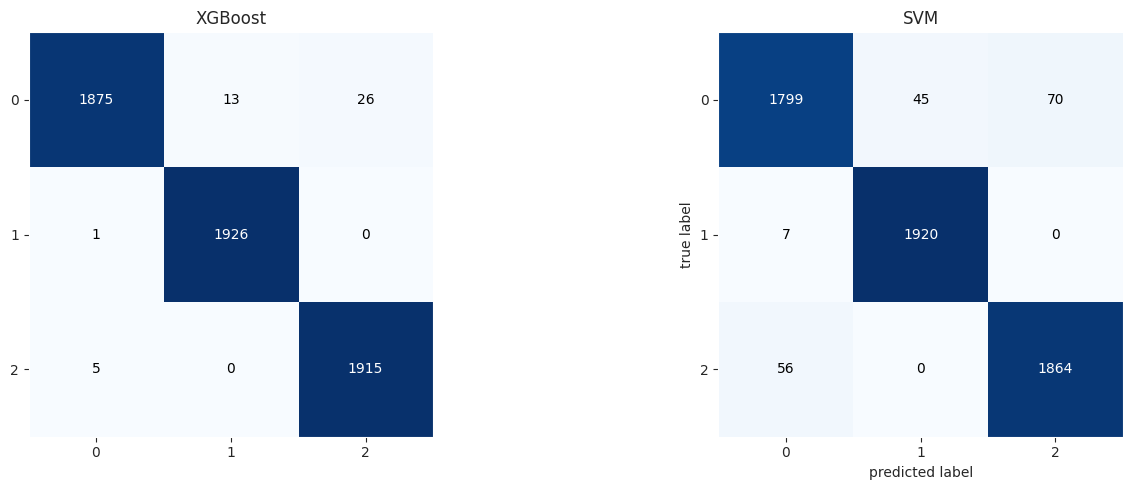

In [56]:
from mlxtend.plotting import plot_confusion_matrix

titles =['XGBoost', 'SVM']
fig, axs = plt.subplots(1, len(titles), figsize=(15, 5))

for i, ax in enumerate(axs):
    plot_confusion_matrix(con_matrices[i], axis=ax)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

In [57]:
XGB.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

In [58]:
import pickle
pickle.dump(XGB,open('/content/drive/MyDrive/Thyroid/flask/Training/thyroid_1_model.pkl','wb'))